# **Práctica 12: Pronóstico (Bosques aleatorios)**

Nombre:

No. Cuenta:

Email:

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [4]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2022-11-22', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0,0.0
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0,0.0
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0,0.0
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0,0.0
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0,0.0
...,...,...,...,...,...,...,...
2022-11-15 00:00:00-05:00,103.209999,103.790001,97.339996,98.940002,111336300,0,0.0
2022-11-16 00:00:00-05:00,96.849998,98.489998,95.540001,97.120003,87958800,0,0.0
2022-11-17 00:00:00-05:00,95.370003,96.970001,94.029999,94.849998,82617900,0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
AmazonHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 981 entries, 2019-01-02 00:00:00-05:00 to 2022-11-21 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          981 non-null    float64
 1   High          981 non-null    float64
 2   Low           981 non-null    float64
 3   Close         981 non-null    float64
 4   Volume        981 non-null    int64  
 5   Dividends     981 non-null    int64  
 6   Stock Splits  981 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 61.3 KB


In [6]:
AmazonHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,981.000000,981.000000,981.000000,981.000000,9.810000e+02,981.0,981.000000
mean,130.373759,131.947712,128.659595,130.305605,8.019086e+07,0.0,0.020387
std,33.271870,33.609849,32.831967,33.172405,3.498417e+07,0.0,0.638551
min,73.260002,76.900002,73.046501,75.014000,1.762600e+07,0.0,0.000000
25%,94.900002,95.561996,93.772499,94.599998,5.634800e+07,0.0,0.000000
50%,132.750000,134.871506,131.591003,133.220001,7.029200e+07,0.0,0.000000
75%,161.500000,163.201004,159.600494,161.413498,9.420600e+07,0.0,0.000000
max,187.199997,188.654007,184.839493,186.570496,3.113460e+08,0.0,20.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

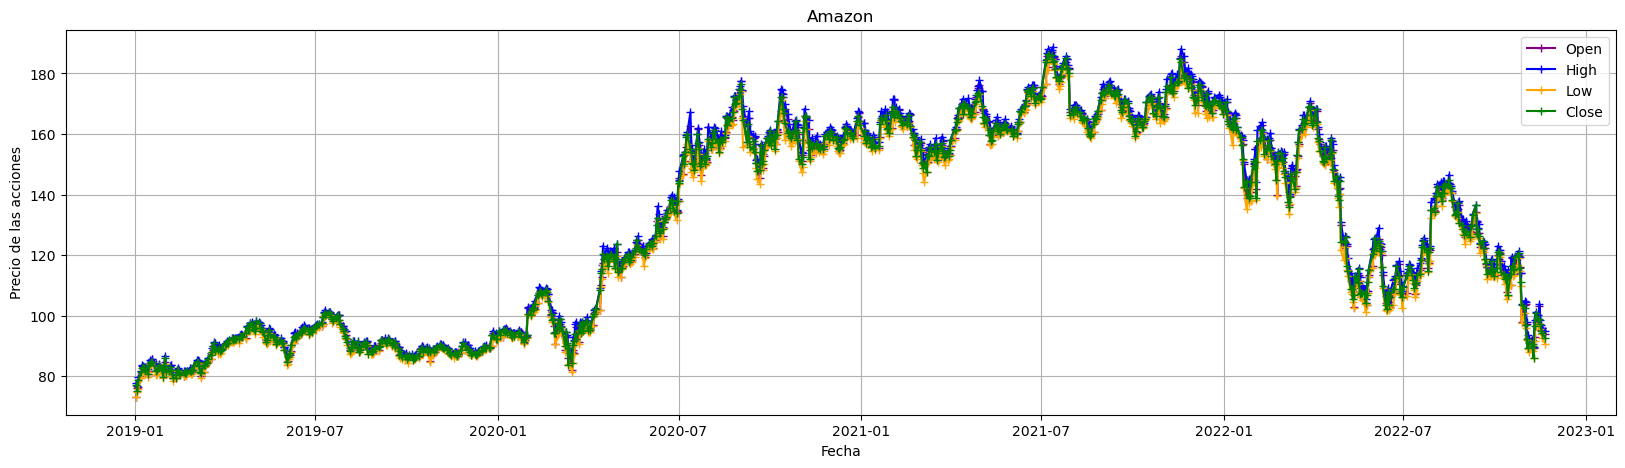

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='purple', marker='+', label='Open')
plt.plot(AmazonHist['High'], color='blue', marker='+', label='High')
plt.plot(AmazonHist['Low'], color='orange', marker='+', label='Low')
plt.plot(AmazonHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
MDatos = AmazonHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2022-11-15 00:00:00-05:00,103.209999,103.790001,97.339996,98.940002
2022-11-16 00:00:00-05:00,96.849998,98.489998,95.540001,97.120003
2022-11-17 00:00:00-05:00,95.370003,96.970001,94.029999,94.849998


In [9]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2022-11-15 00:00:00-05:00,103.209999,103.790001,97.339996,98.940002
2022-11-16 00:00:00-05:00,96.849998,98.489998,95.540001,97.120003
2022-11-17 00:00:00-05:00,95.370003,96.970001,94.029999,94.849998


### Aplicación del algoritmo

In [10]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [11]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,73.260002,77.667999,73.046501
1,76.000504,76.900002,74.855499
2,76.500000,79.699997,75.915497
3,80.115501,81.727997,79.459503
4,83.234497,83.830498,80.830498
...,...,...,...
976,103.209999,103.790001,97.339996
977,96.849998,98.489998,95.540001
978,95.370003,96.970001,94.029999
979,95.949997,95.989998,92.480003


In [12]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,76.956497
1,75.014000
2,78.769501
3,81.475502
4,82.829002
...,...
976,98.940002
977,97.120003
978,94.849998
979,94.139999


Se hace la división de los datos

In [13]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [14]:
pd.DataFrame(X_test)

,0,1,2
0,159.177002,159.462494,156.763000
1,87.532997,88.344498,87.280502
2,80.049004,80.464500,79.300003
3,172.903000,176.188995,172.804504
4,171.050003,171.492004,166.565002
...,...,...,...
192,162.296494,164.637497,161.729507
193,81.299004,81.999496,80.806503
194,168.598007,173.600006,165.195007
195,113.500000,114.849998,107.040001


Se entrena el modelo

In [15]:
PronosticoBA = RandomForestRegressor(random_state=0)
PronosticoBA.fit(X_train, Y_train)

#PronosticoBA = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=0)
#PronosticoBA.fit(X_train, Y_train)


/var/folders/3q/9ndt9tvs4t3csrp6qxw_08c40000gn/T/ipykernel_1689/2815334640.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBA.fit(X_train, Y_train)


RandomForestRegressor(random_state=0)

In [16]:
#Se genera el pronóstico
Y_Pronostico = PronosticoBA.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,157.992614
1,87.855732
2,79.892911
3,175.150533
4,168.422914
...,...
192,163.313764
193,81.943233
194,170.238671
195,109.238051


In [17]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
157.992614,156.783005
87.855732,87.475502
79.892911,79.550003
175.150533,175.272003
168.422914,166.777496
...,...
163.313764,163.519501
81.943233,81.820000
170.238671,173.315002
109.238051,107.400002


In [18]:
r2_score(Y_test, Y_Pronostico)

0.9983612486975071

In [19]:
print('Criterio: \n', PronosticoBA.criterion)
print('Importancia variables: \n', PronosticoBA.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))


Criterio: 
 squared_error
Importancia variables: 
 [0.11310753 0.40167939 0.48521308]
MAE: 1.0024
MSE: 1.7578
RMSE: 1.3258
Score: 0.9984


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9984, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 1.75 y 1.32 unidades del valor real, esto es, MSE y RMSE, respectivamente.

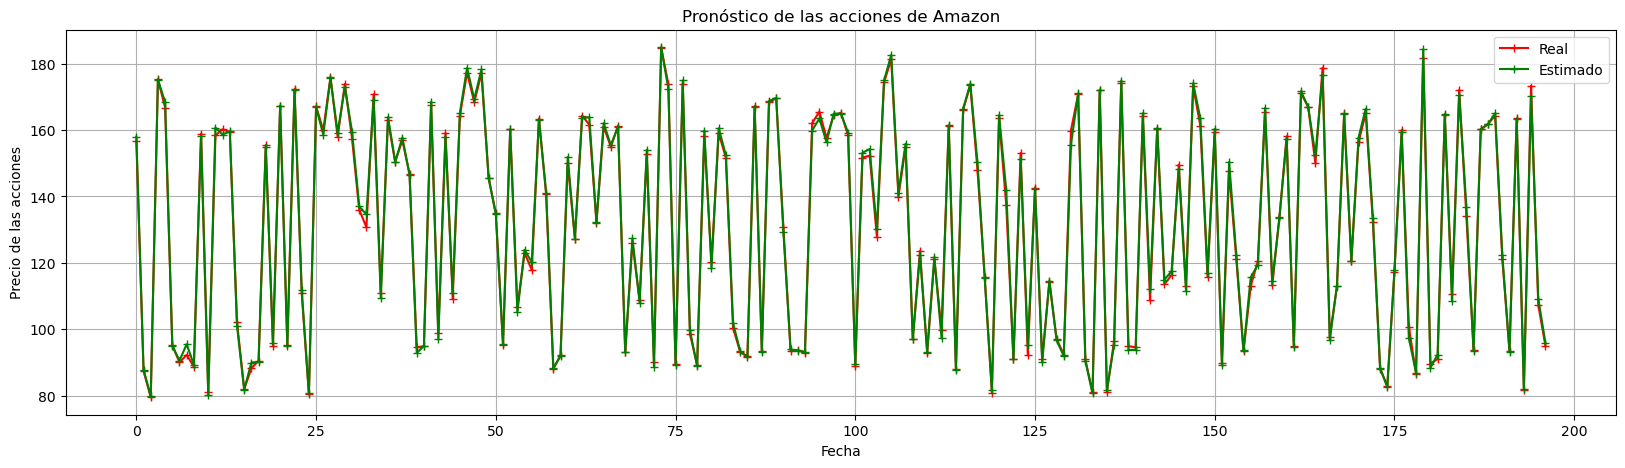

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
2,Low,0.485213
1,High,0.401679
0,Open,0.113108


#### **Conformación del árbol**

In [22]:
Estimador = PronosticoBA.estimators_[99]
Estimador

DecisionTreeRegressor(max_features='auto', random_state=1396067212)

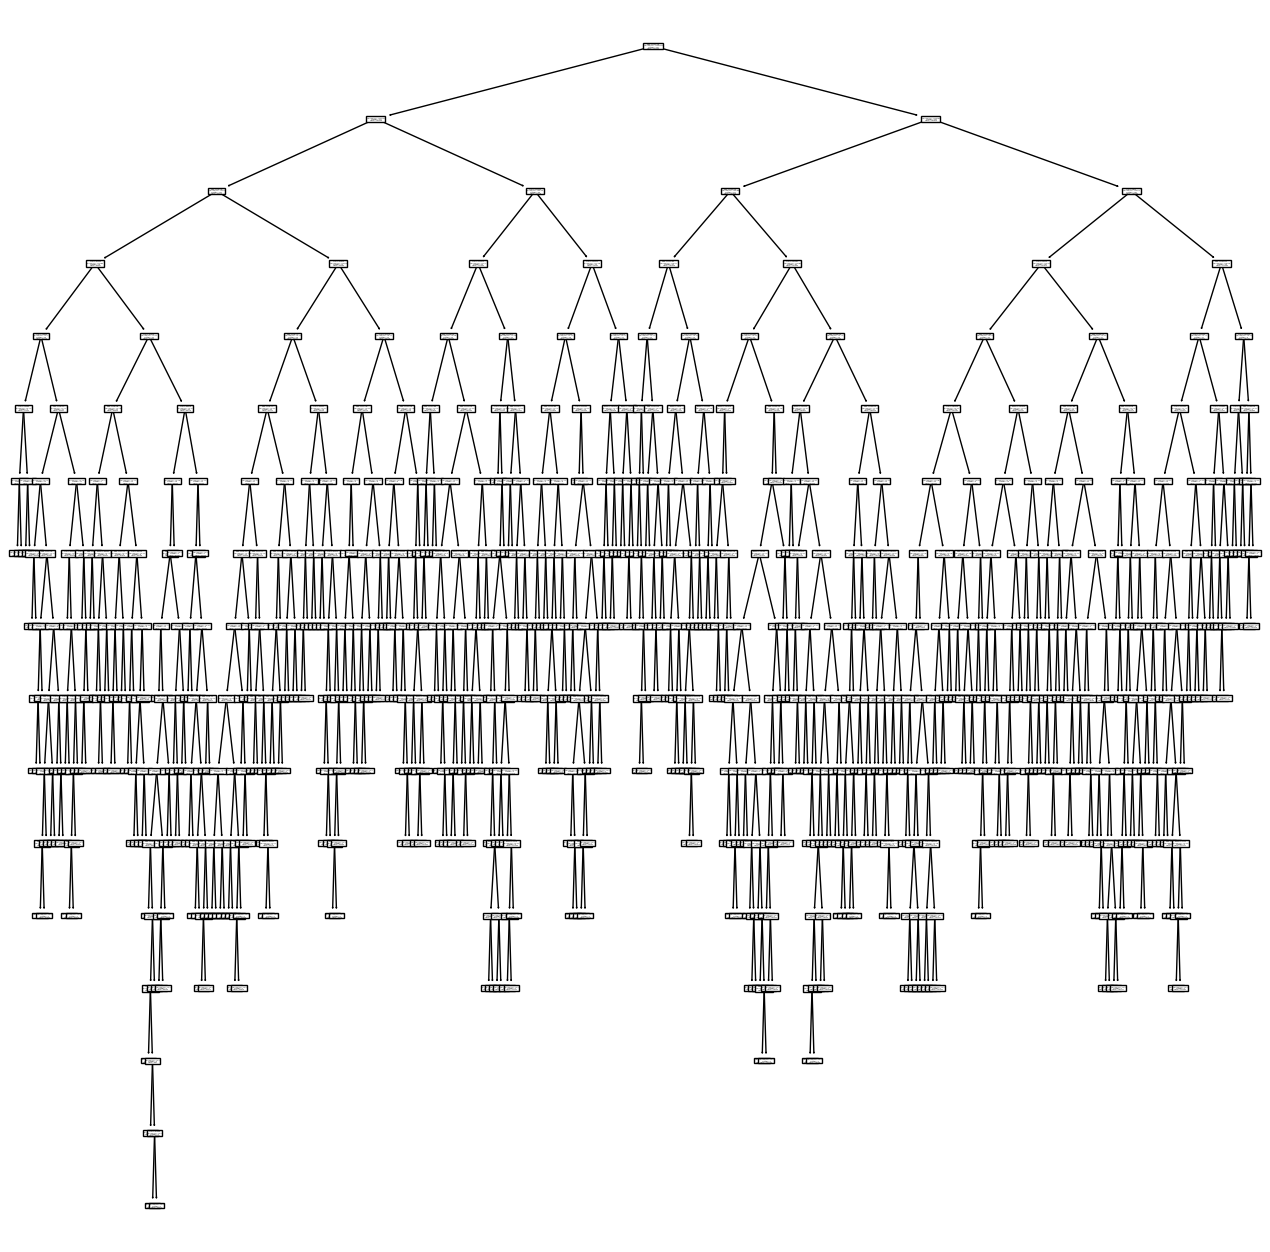

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Open', 'High', 'Low'])
plt.show()

In [24]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- High <= 132.47
|   |--- High <= 104.90
|   |   |--- High <= 90.93
|   |   |   |--- Low <= 84.24
|   |   |   |   |--- Low <= 78.90
|   |   |   |   |   |--- Low <= 75.39
|   |   |   |   |   |   |--- High <= 77.28
|   |   |   |   |   |   |   |--- value: [75.01]
|   |   |   |   |   |   |--- High >  77.28
|   |   |   |   |   |   |   |--- value: [76.96]
|   |   |   |   |   |--- Low >  75.39
|   |   |   |   |   |   |--- Low <= 77.13
|   |   |   |   |   |   |   |--- value: [78.77]
|   |   |   |   |   |   |--- Low >  77.13
|   |   |   |   |   |   |   |--- value: [79.41]
|   |   |   |   |--- Low >  78.90
|   |   |   |   |   |--- High <= 83.66
|   |   |   |   |   |   |--- High <= 81.66
|   |   |   |   |   |   |   |--- Open <= 81.41
|   |   |   |   |   |   |   |   |--- value: [80.72]
|   |   |   |   |   |   |   |--- Open >  81.41
|   |   |   |   |   |   |   |   |--- value: [79.69]
|   |   |   |   |   |   |--- High >  81.66
|   |   |   |   |   |   |   |--- High <= 81.86
|   |   |   |   |   |  

# Validación del modelo

ValueError: Expected 'estimator' to be a binary classifier, but got RandomForestRegressor

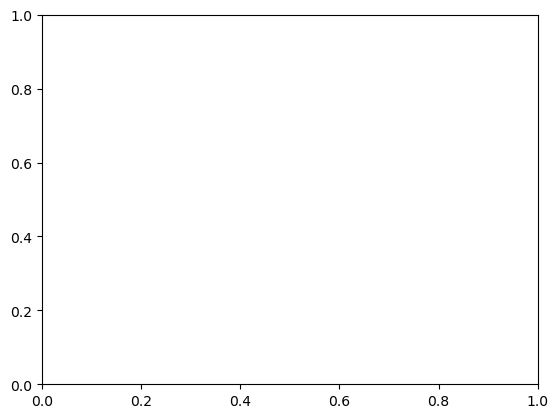

#### **Nuevos pronósticos**

In [27]:
PrecioAccion = pd.DataFrame({'Open': [108.2],
                             'High': [112.2], 
                             'Low': [100.8]})
PronosticoBA.predict(PrecioAccion)

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([107.0222094])